In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame as DF
import matplotlib.pyplot as plt

# 1 Data

In [3]:

def SMA(df, n):
    '''
    Simple Moving Average
    '''
    df['SMA_' + str(n)] = pd.Series.rolling(df['Close'], n).mean()
    return df 

In [4]:
def VSMA(df, n):
    '''
    Simple Moving Average
    '''
    df['VSMA_' + str(n)] = pd.Series.rolling(df['Volume'], n).mean()
    return df 

In [5]:
def BBANDS(df, n, multiplier=2, middle=False):
    '''
    Bollinger Bands
    '''
    ma = pd.Series.rolling(df['Close'], n).mean()
    msd = pd.Series.rolling(df['Close'], n).std()

    b1 = 4 * msd / ma
    b2 = (df['Close'] - ma + multiplier * msd) / (4 * msd)

    df['BBANDSup_' + str(n)] = b1

    if middle:
        df['BBANDSmiddle_' + str(n)] = ma

    df['BBANDSdown_' + str(n)] = b2
    return df

In [6]:
data=pd.read_csv('/Apple_data.csv',index_col='Date')
data=data[['Close','Volume']]
data

,Close,Volume
Date,,
2018-02-15,43.247501,204588800
2018-02-16,43.107498,160704400
2018-02-20,42.962502,135722000
2018-02-21,42.767502,149886400
2018-02-22,43.125000,123967600
...,...,...
2023-10-03,172.399994,49594600
2023-10-04,173.660004,53020300
2023-10-05,174.910004,48527900


In [7]:
SMA(data, 5)
SMA(data, 20)
SMA(data, 80)

,Close,Volume,SMA_5,SMA_20,SMA_80
Date,,,,,
2018-02-15,43.247501,204588800,NaN,NaN,NaN
2018-02-16,43.107498,160704400,NaN,NaN,NaN
2018-02-20,42.962502,135722000,NaN,NaN,NaN
2018-02-21,42.767502,149886400,NaN,NaN,NaN
2018-02-22,43.125000,123967600,43.042001,NaN,NaN
...,...,...,...,...,...
2023-10-03,172.399994,49594600,171.695999,175.352000,183.638625
2023-10-04,173.660004,53020300,172.342001,174.889500,183.547375
2023-10-05,174.910004,48527900,173.186002,174.757001,183.436375


In [8]:
VSMA(data, 5)
VSMA(data, 20)
VSMA(data, 80)

,Close,Volume,SMA_5,SMA_20,SMA_80,VSMA_5,VSMA_20,VSMA_80
Date,,,,,,,,
2018-02-15,43.247501,204588800,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-16,43.107498,160704400,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-20,42.962502,135722000,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-21,42.767502,149886400,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-22,43.125000,123967600,43.042001,NaN,NaN,154973840.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-10-03,172.399994,49594600,171.695999,175.352000,183.638625,55357900.0,67416655.0,57814381.25
2023-10-04,173.660004,53020300,172.342001,174.889500,183.547375,52577600.0,65979880.0,57866251.25
2023-10-05,174.910004,48527900,173.186002,174.757001,183.436375,51024300.0,62781835.0,57794413.75


In [9]:
BBANDS(data,20, multiplier=2, middle=False)

,Close,Volume,SMA_5,SMA_20,SMA_80,VSMA_5,VSMA_20,VSMA_80,BBANDSup_20,BBANDSdown_20
Date,,,,,,,,,,
2018-02-15,43.247501,204588800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-16,43.107498,160704400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-20,42.962502,135722000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-21,42.767502,149886400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-22,43.125000,123967600,43.042001,NaN,NaN,154973840.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-10-03,172.399994,49594600,171.695999,175.352000,183.638625,55357900.0,67416655.0,57814381.25,0.073638,0.271386
2023-10-04,173.660004,53020300,172.342001,174.889500,183.547375,52577600.0,65979880.0,57866251.25,0.061965,0.386546
2023-10-05,174.910004,48527900,173.186002,174.757001,183.436375,51024300.0,62781835.0,57794413.75,0.060325,0.514513


In [10]:
# delete NaN
data.dropna(inplace=True)
data

,Close,Volume,SMA_5,SMA_20,SMA_80,VSMA_5,VSMA_20,VSMA_80,BBANDSup_20,BBANDSdown_20
Date,,,,,,,,,,
2018-06-11,47.807499,73234000,48.184000,47.299625,44.469750,87049680.0,84170380.0,1.250891e+08,0.052706,0.703723
2018-06-12,48.070000,67644400,48.132500,47.351250,44.530031,83325760.0,83396840.0,1.233773e+08,0.054304,0.779522
2018-06-13,47.674999,86553600,47.968500,47.404500,44.587125,83889600.0,82985480.0,1.224504e+08,0.052483,0.608726
2018-06-14,47.700001,86440400,47.835500,47.437250,44.646344,84099920.0,83470880.0,1.218344e+08,0.052220,0.606069
2018-06-15,47.209999,246876800,47.692500,47.460375,44.701875,112149840.0,92355920.0,1.230467e+08,0.050613,0.395769
...,...,...,...,...,...,...,...,...,...,...
2023-10-03,172.399994,49594600,171.695999,175.352000,183.638625,55357900.0,67416655.0,5.781438e+07,0.073638,0.271386
2023-10-04,173.660004,53020300,172.342001,174.889500,183.547375,52577600.0,65979880.0,5.786625e+07,0.061965,0.386546
2023-10-05,174.910004,48527900,173.186002,174.757001,183.436375,51024300.0,62781835.0,5.779441e+07,0.060325,0.514513


# 2 Trend Strategy

模型准确率 (Model Accuracy): 0.5092936802973977


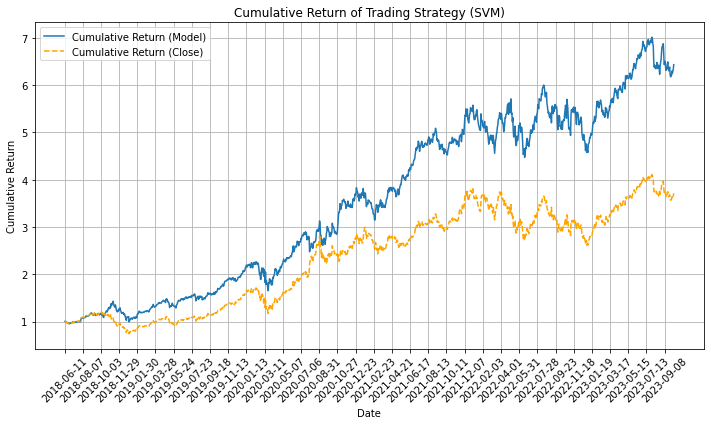

In [11]:
import pandas as pd
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# 创建特征 (Create features)
data['SMA5_GT_Close'] = data['SMA_5'] < data['Close']
data['SMA20_GT_SMA5'] = data['SMA_20'] < data['SMA_5']
data['SMA80_GT_SMA20'] = data['SMA_80'] < data['SMA_20']

# 创建目标变量：明天的收盘价相对于今天的涨跌 (Create target variable: Tomorrow's closing price relative to today's)
data['Next_Close'] = data['Close'].shift(-1)
data['Price_Up'] = data['Next_Close'] > data['Close']

# 删除包含NaN值的行 (Drop rows containing NaN values)
data = data.dropna()

# 划分数据集为训练集和测试集 (Split the dataset into training and testing sets)
X = data[['SMA5_GT_Close', 'SMA20_GT_SMA5', 'SMA80_GT_SMA20']]
y = data['Price_Up']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SVM分类模型 (Create a Support Vector Machine classification model)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# 在测试集上评估模型 (Evaluate the model on the test set)
accuracy = svm_model.score(X_test, y_test)
print(f"模型准确率 (Model Accuracy): {accuracy}")

# 使用模型进行交易决策 (Use the model for trading decisions)
data['Predicted_Signal'] = svm_model.predict(X)

# 模拟交易策略 (Simulate trading strategy)
data['Position'] = 0
data.loc[data['Predicted_Signal'], 'Position'] = 1  # 买入信号 (Buy signal)
data.loc[~data['Predicted_Signal'], 'Position'] = -1  # 卖出信号 (Sell signal)

# 模拟每日收益 (Simulate daily returns)
data['Daily_Return'] = data['Close'].pct_change() * data['Position'].shift(1)

# 计算累积收益 (Calculate cumulative returns)
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

# 计算'Close'列的累积收益 (Calculate cumulative return of 'Close' column)
data['Close_Cumulative_Return'] = (1 + data['Close'].pct_change()).cumprod()

# 绘制累积收益曲线，每20天显示一个日期 (Plot the cumulative return curve, displaying every 20 days)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cumulative_Return'], label='Cumulative Return (Model)')
plt.plot(data.index, data['Close_Cumulative_Return'], label='Cumulative Return (Close)', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of Trading Strategy (SVM)')
plt.legend()
plt.grid()

# 调整日期标签的间隔 (Adjust the interval of date labels)
plt.xticks(data.index[::40], rotation=45)

plt.show()


# 3 Introducing regressors factors in trend strategies

模型准确率 (Model Accuracy): 0.5393258426966292


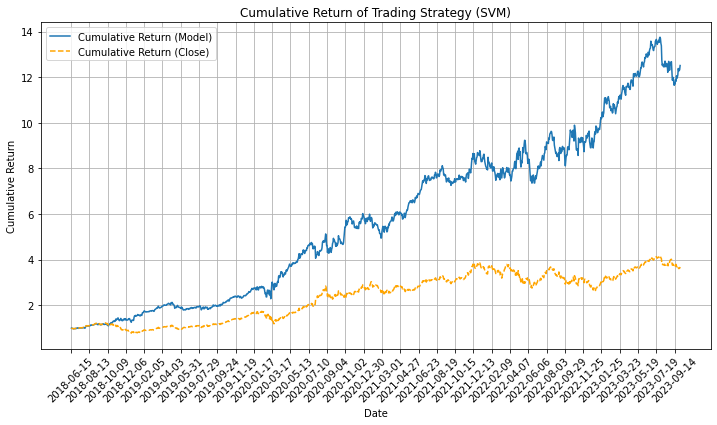

In [15]:
import pandas as pd
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# 创建特征 (Create features)
data['SMA5_GT_Close'] = data['SMA_5'] < data['Close']
data['SMA20_GT_SMA5'] = data['SMA_20'] < data['SMA_5']
data['SMA80_GT_SMA20'] = data['SMA_80'] < data['SMA_20']
data['BBANDSup_20_Close'] = data['BBANDSup_20'] < data['Close']
data['BBANDSdown_20_Close'] = data['BBANDSdown_20'] > data['Close']

# 创建目标变量：明天的收盘价相对于今天的涨跌 (Create target variable: Tomorrow's closing price relative to today's)
data['Next_Close'] = data['Close'].shift(-1)
data['Price_Up'] = data['Next_Close'] > data['Close']

# 删除包含NaN值的行 (Drop rows containing NaN values)
data = data.dropna()

# 划分数据集为训练集和测试集 (Split the dataset into training and testing sets)
X = data[['SMA5_GT_Close', 'SMA20_GT_SMA5', 'SMA80_GT_SMA20', 'BBANDSup_20_Close', 'BBANDSdown_20_Close']]
y = data['Price_Up']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SVM分类模型 (Create a Support Vector Machine classification model)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# 在测试集上评估模型 (Evaluate the model on the test set)
accuracy = svm_model.score(X_test, y_test)
print(f"模型准确率 (Model Accuracy): {accuracy}")

# 使用模型进行交易决策 (Use the model for trading decisions)
data['Predicted_Signal'] = svm_model.predict(X)

# 模拟交易策略 (Simulate trading strategy)
data['Position'] = 0
data.loc[data['Predicted_Signal'], 'Position'] = 1  # 买入信号 (Buy signal)
data.loc[~data['Predicted_Signal'], 'Position'] = -1  # 卖出信号 (Sell signal)

# 模拟每日收益 (Simulate daily returns)
data['Daily_Return'] = data['Close'].pct_change() * data['Position'].shift(1)

# 计算累积收益 (Calculate cumulative returns)
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

# 计算'Close'列的累积收益 (Calculate cumulative return of 'Close' column)
data['Close_Cumulative_Return'] = (1 + data['Close'].pct_change()).cumprod()

# 绘制累积收益曲线，每20天显示一个日期 (Plot the cumulative return curve, displaying every 20 days)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cumulative_Return'], label='Cumulative Return (Model)')
plt.plot(data.index, data['Close_Cumulative_Return'], label='Cumulative Return (Close)', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of Trading Strategy (SVM)')
plt.legend()
plt.grid()

# 调整日期标签的间隔 (Adjust the interval of date labels)
plt.xticks(data.index[::40], rotation=45)

plt.show()



# 4 Introducing Volume Factors in Trend Strategies

模型准确率 (Model Accuracy): 0.5280898876404494


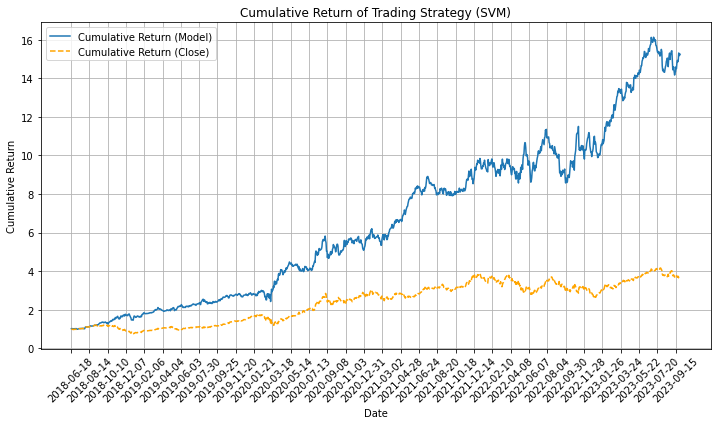

In [16]:
import pandas as pd
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# 创建特征 (Create features)
data['SMA5_GT_Close'] = (data['SMA_5'] < data['Close'])
data['SMA20_GT_SMA5'] = data['SMA_20'] < data['SMA_5']
data['SMA80_GT_SMA20'] = data['SMA_80'] < data['SMA_20']
data['VSMA5_GT_Volume'] = data['VSMA_5'] < data['Volume']
data['VSMA20_GT_VSMA5'] = data['VSMA_20'] < data['VSMA_5']
data['VSMA80_GT_VSMA20'] = data['VSMA_80'] < data['VSMA_20']

# 创建目标变量：明天的收盘价相对于今天的涨跌 (Create target variable: Tomorrow's closing price relative to today's)
data['Next_Close'] = data['Close'].shift(-1)
data['Price_Up'] = data['Next_Close'] > data['Close']

# 删除包含NaN值的行 (Drop rows containing NaN values)
data = data.dropna()

# 划分数据集为训练集和测试集 (Split the dataset into training and testing sets)
X = data[['SMA5_GT_Close', 'SMA20_GT_SMA5', 'SMA80_GT_SMA20', 'VSMA5_GT_Volume', 'VSMA20_GT_VSMA5', 'VSMA80_GT_VSMA20']]
y = data['Price_Up']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SVM分类模型 (Create a Support Vector Machine classification model)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# 在测试集上评估模型 (Evaluate the model on the test set)
accuracy = svm_model.score(X_test, y_test)
print(f"模型准确率 (Model Accuracy): {accuracy}")

# 使用模型进行交易决策 (Use the model for trading decisions)
data['Predicted_Signal'] = svm_model.predict(X)

# 模拟交易策略 (Simulate trading strategy)
data['Position'] = 0
data.loc[data['Predicted_Signal'], 'Position'] = 1  # 买入信号 (Buy signal)
data.loc[~data['Predicted_Signal'], 'Position'] = -1  # 卖出信号 (Sell signal)

# 模拟每日收益 (Simulate daily returns)
data['Daily_Return'] = data['Close'].pct_change() * data['Position'].shift(1)

# 计算累积收益 (Calculate cumulative returns)
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

# 计算'Close'列的累积收益 (Calculate cumulative return of 'Close' column)
data['Close_Cumulative_Return'] = (1 + data['Close'].pct_change()).cumprod()

# 绘制累积收益曲线，每20天显示一个日期 (Plot the cumulative return curve, displaying every 20 days)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cumulative_Return'], label='Cumulative Return (Model)')
plt.plot(data.index, data['Close_Cumulative_Return'], label='Cumulative Return (Close)', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of Trading Strategy (SVM)')
plt.legend()
plt.grid()

# 调整日期标签的间隔 (Adjust the interval of date labels)
plt.xticks(data.index[::40], rotation=45)

plt.show()


# 5 Introducing both regressors and volume factors in trend strategies

模型准确率 (Model Accuracy): 0.4981132075471698


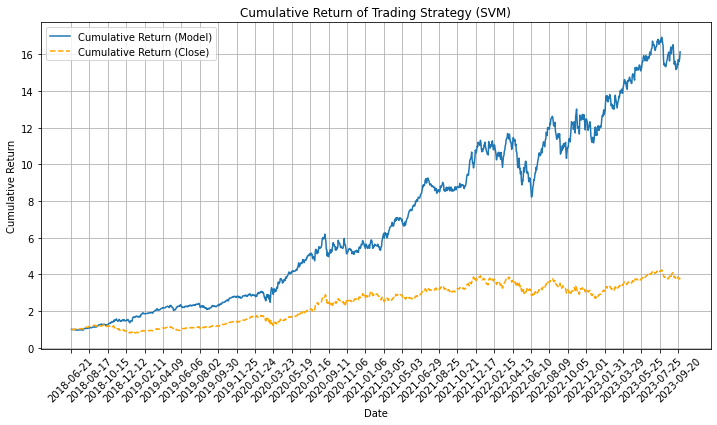

In [19]:
import pandas as pd
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# 创建特征 (Create features)
data['SMA5_GT_Close'] = (data['SMA_5'] < data['Close'])
data['SMA20_GT_SMA5'] = data['SMA_20'] < data['SMA_5']
data['SMA80_GT_SMA20'] = data['SMA_80'] < data['SMA_20']
data['VSMA5_GT_Volume'] = data['VSMA_5'] < data['Volume']
data['VSMA20_GT_VSMA5'] = data['VSMA_20'] < data['VSMA_5']
data['VSMA80_GT_VSMA20'] = data['VSMA_80'] < data['VSMA_20']
data['BBANDSup_20_Close'] = data['BBANDSup_20'] < data['Close']
data['BBANDSdown_20_Close'] = data['BBANDSdown_20'] > data['Close']

# 创建目标变量：明天的收盘价相对于今天的涨跌 (Create target variable: Tomorrow's closing price relative to today's)
data['Next_Close'] = data['Close'].shift(-1)
data['Price_Up'] = data['Next_Close'] > data['Close']

# 删除包含NaN值的行 (Drop rows containing NaN values)
data = data.dropna()

# 划分数据集为训练集和测试集 (Split the dataset into training and testing sets)
X = data[['SMA5_GT_Close', 'SMA20_GT_SMA5', 'SMA80_GT_SMA20', 'VSMA5_GT_Volume', 'VSMA20_GT_VSMA5', 'VSMA80_GT_VSMA20', 'BBANDSup_20_Close', 'BBANDSdown_20_Close']]
y = data['Price_Up']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SVM分类模型 (Create a Support Vector Machine classification model)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# 在测试集上评估模型 (Evaluate the model on the test set)
accuracy = svm_model.score(X_test, y_test)
print(f"模型准确率 (Model Accuracy): {accuracy}")

# 使用模型进行交易决策 (Use the model for trading decisions)
data['Predicted_Signal'] = svm_model.predict(X)

# 模拟交易策略 (Simulate trading strategy)
data['Position'] = 0
data.loc[data['Predicted_Signal'], 'Position'] = 1  # 买入信号 (Buy signal)
data.loc[~data['Predicted_Signal'], 'Position'] = -1  # 卖出信号 (Sell signal)

# 模拟每日收益 (Simulate daily returns)
data['Daily_Return'] = data['Close'].pct_change() * data['Position'].shift(1)

# 计算累积收益 (Calculate cumulative returns)
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

# 计算'Close'列的累积收益 (Calculate cumulative return of 'Close' column)
data['Close_Cumulative_Return'] = (1 + data['Close'].pct_change()).cumprod()

# 绘制累积收益曲线，每20天显示一个日期 (Plot the cumulative return curve, displaying every 20 days)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cumulative_Return'], label='Cumulative Return (Model)')
plt.plot(data.index, data['Close_Cumulative_Return'], label='Cumulative Return (Close)', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of Trading Strategy (SVM)')
plt.legend()
plt.grid()

# 调整日期标签的间隔 (Adjust the interval of date labels)
plt.xticks(data.index[::40], rotation=45)

plt.show()
